# Set up and Config

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import anndata as ad
import PyPDF2
import matplotlib.pyplot as plt
import statistics as st
from pathlib import Path
import scipy.stats as stats
from collections import defaultdict
from statannot import add_stat_annotation

In [2]:
#Adata Files
adata_processed = "/mnt/ibm_sm/home/lea.mcgeever/ms/notebooks/adata_files/adata_processed__02172022.h5ad"
adata = sc.read_h5ad(adata_processed)

adata_tissue = "/mnt/ibm_sm/home/lea.mcgeever/ms/notebooks/adata_files/adata_kidney_processed_03072022.h5ad"
tissue = sc.read_h5ad(adata_tissue)

sc.settings.verbosity = 3             
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.8 pynndescent==0.5.5


# Clustering

Thymus

In [ ]:
#adata_kidney = adata[adata.obs['tissue'] == "Kidney"].copy()
#sc.pp.pca(adata_kidney)
#sc.pp.neighbors(adata_kidney, n_pcs=9)
#sc.tl.leiden(adata_kidney) 
#sc.tl.umap(adata_kidney)

In [ ]:
#adata_kidney_processed = "/mnt/ibm_sm/home/lea.mcgeever/ms/notebooks/adata_files/adata_kidney_processed_03072022.h5ad"
#adata_kidney.write(adata_kidney_processed)


# Clustering consistancy

In [ ]:
sc.pl.umap(tissue, color = ['leiden', 'cell_ontology_class'], wspace= 0.5)

## Kidney

### mt genes

In [ ]:
sc.pl.umap(tissue, color = ['mt-Atp6','mt-Atp8','mt-Co1','mt-Co2','mt-Co3','mt-Cytb','mt-Nd1','mt-Nd2','mt-Nd3','mt-Nd4','mt-Nd4l','mt-Nd5','mt-Nd6','mt-Rnr1','mt-Rnr2','mt-Ta','mt-Te','mt-Tf','mt-Ti','mt-Tl1','mt-Tl2','mt-Tm','mt-Tp','mt-Tq','mt-Tt','mt-Tv'], wspace= 0.5, color_map='Oranges', ncols=3)


* "Mechanistically, through an autocrine effect, macrophage-derived TSP1 suppressed Smpdl3b expression in liver, which amplified liver proinflammatory signalling (Toll-like receptor 4 signal pathway) and promoted NAFLD progression." https://pubmed.ncbi.nlm.nih.gov/33294831/

* "Binding of mycobacterial trehalose 6,6'- dimycolate (TDM) to [Fcer1g] receptor complex leads to phosphorylation of ITAM, triggering activation of SYK, CARD9 and NF-kappa-B, consequently driving maturation of antigen-presenting cells and shaping antigen-specific priming of T-cells toward effector T-helper 1 and T-helper 17 cell subtypes." https://www.proteinatlas.org/ENSG00000158869-FCER1G 

In [ ]:
sc.pl.umap(tissue, color = ['Cd36', 'Cd38','Smpdl3b','Thbs1','Tlr4','Nfkb1','Syk','Card9'], wspace= 0.5, color_map='Oranges', ncols=3)

In [ ]:
sc.pl.umap(tissue, color = ['leiden', 'age'], wspace=.5)

In [ ]:
sc.pl.umap(tissue, color = ['leiden', 'cell_ontology_class'], wspace= 0.5)

In [ ]:
sc.pl.umap(tissue, color = ['leiden', 'mouse.id'], wspace= 0.4)

In [ ]:
sc.pl.umap(tissue, color = ['Cd19', 'Cd27','Cd38', 'Cd40lg', 'Il2', 'Il10'], wspace= 0.4, color_map='Oranges', ncols = 3)
#B cell marker, Cd19+, Cd27-, Cd38+
#Ig Secreting Cells (ISC) can be generated in vitro by culturing human B cells w/T cell-derived stimuli CD40L, IL-2, and IL-10

### Macrophage inflammatory protein production

In [ ]:
#as noted on geneontology.org 
sc.pl.umap(tissue, color = ['Mefv', 'Arg2','Mcoln2','Trem2','Nod2','Sirpa','Trpv4'], wspace= 0.5, color_map= 'Oranges', ncols= 3)


### B cell receptor complex

In [ ]:
#as noted on geneontology.org
sc.pl.umap(tissue, color = ['Ighm','Iglc1','Syk','Ighd','Lime1', 'Cd79a','Cd79b'], wspace= 0.5, color_map= 'Oranges', ncols= 3)
#sc.pl.umap(tissue, color = ['Ighm','Ighd','Cd79a','Cd79b'], wspace= 0.5, color_map= 'Oranges', ncols= 4)


### Macrophage regulation

According to Human Protein Atlas
* Ulbp1: All immune cells, higest in macrophages
* Grn: Many immune cells, most highly in Hofbauer, Kupffer and macrophage cells
* Cx3cl1: low in immune cells
* Fer1l5: low in immune cells
* Cd200: Enriched in B cells, monocytes. most immune cells
* Syt11: all immune cells
* Bpi: Among immune cells, highest in monocytes
* Pla2g10: barely detected in immune cells

In [ ]:
#as noted on geneontology.org
sc.pl.umap(tissue, color = ['Ulbp1','Cx3cl1','Fer1l5','Grn','Cd200','Shpk', 'Syt11','Bpi','Pla2g10'], wspace= 0.5, color_map= 'Oranges', ncols= 3)


### B cell differentiation

* Cd24a: results in acquisition of features of immature B cell
* Bcl6: results in acquisition of features of B cell

In [ ]:
#as noted on geneontology.org
sc.pl.umap(tissue, color = ['Rag1', 'Rag2','Cd24a','Bcl6','Atm','Foxp1','Dock10','Dpp4','Bax','Prdm1','Traf3ip2','Adgrg3','Atp11c', 'Bak1','Plcl2'], wspace= 0.5, color_map= 'Oranges', ncols= 3)


### Interferon genes

In [ ]:
sc.pl.umap(tissue, color = ['Ifnlr1','Ifnl3','Ifnar1','Ifnar2','Klhl20','Nfkb1'], wspace= 0.5, color_map= 'Oranges', ncols= 3)
#Ifnl3 is interferon lambda
#Ifnlr1 is interferon lambda receptor 
#Ifnar1 IFN-a and -b receptor
#Ifnar2 IFN-a and -b receptor
#Klhl20 IFN gamma binding
#Nfkb1 is Nf-kb

### Macropahge proliferation genes

In [ ]:
sc.pl.umap(tissue, color = ['Cx3cl1','Ptk2','Gba','Csf1r','Csf1','Il34','Mapk3','Mapk1'], wspace= 0.5, color_map= 'Oranges', ncols= 3)

### 'Iglc3','Iglc2','Igkc'

Highly expressed in B cells and Plasma cells, less so in T cells, not macrophages

In [ ]:
sc.pl.umap(tissue, color = ['Iglc3','Iglc2','Igkc'], wspace= 0.5, color_map= 'Oranges', ncols= 3)


### 'Cd79a','Cd79b','Cd37'

"CD37 is a tetraspanin expressed prominently on the surface of B cells" (https://pubmed.ncbi.nlm.nih.gov/33333768/)

In [ ]:
sc.pl.umap(tissue, color = ['Cd79a','Cd79b','Cd37'], wspace= 0.5, color_map= 'Oranges')

### Macrophage M1/M2 polarization, Yunna et al. 2020

In [ ]:
#M1
sc.pl.umap(tissue, color = ['Il6','Il12a','Il12b',
                            'Tnf','Cd80','Cd86',
                            'Fcgr3','Fcgr4','Fcgr2b'], wspace= 0.5, color_map= 'Oranges',ncols = 3)
#M1 overexpress: Cd80, Cd86, Cd16/32
#Fcgr3 is Cd16. Fcgr4 similar?
#Fcgr2b is Cd32

#M1 produce Il-12, Il-6, Tnf

In [ ]:
#M2, leiden 10?
sc.pl.umap(tissue, color = ['Arg1','Mrc1','Il10',
                            'Ccl17','Ccl22', 'Pparg',
                           'Ppargc1a'], wspace= 0.5, color_map= 'Oranges',ncols = 3)

#M2 overexpress: 'Arg1','Mrc1','Il10','Ccl17','Ccl22'
#Mrc1 is Cd206, mannose receptor
#Pparg, nuclear transcpxn factor promotes M2, inhibits M1
#Ppargc1a, This protein interacts with PPARgamma, It provides a direct link between external physiological stimuli and the regulation of mitochondrial biogenesis, and is a major factor that regulates muscle fiber type determination.

### Jablonski M1 & M2 marker genes

In [ ]:
sc.pl.umap(tissue, color = ['Cd38','Myc','Fpr2','Egr2','Gpr18',
                   'Nos2','Il1b','Il6','Il12b','Ccr7',
                   'Inhba','Tnf','Arg1','Retnla','Fn1',
                   'Mrc1'], wspace= 0.5, color_map= 'Oranges',ncols = 3)

In [ ]:
M1_short = ['Junb','Cebpd','Cav1','Herpud1','Tgm2','Egr1','Il2rg','Dck','Ifitm3','Srgn','Sqstm1','Atf4','Tapbp','Hspa5']

M2_short = ['Egr2','Tns1','Ypel3','Pdcd4','Dnmt1','Gmnn','Rapgef6','Mxi1','H2afv','Nfic','Tsc22d3','AU020206','Dag1','Parp1','Paip2','Erp29','Sash3','Ptpn22','Siva1','Rmnd5a','Selplg','Cdk2ap2','Timp2','Map1lc3b','Ppp2r5c','Cd151','Dusp3','Vamp4','Crip1','Gltp','Ctnnb1','B4galnt1']


In [ ]:
#M1 short
sc.pl.umap(tissue, color = ['Junb','Cebpd','Cav1','Herpud1','Tgm2',
                            'Egr1','Il2rg','Dck','Ifitm3','Srgn','Sqstm1',
                            'Atf4','Tapbp','Hspa5'], wspace= 0.5, color_map= 'Oranges',ncols = 3)

In [ ]:
#M2 short

sc.pl.umap(tissue, color = ['Egr2','Tns1','Ypel3',
                            'Pdcd4','Dnmt1','Gmnn',
                            'Rapgef6','Mxi1','H2afv',
                            'Nfic','Tsc22d3','AU020206',
                            'Dag1','Parp1','Paip2',
                            'Erp29','Sash3','Ptpn22',
                            'Siva1','Rmnd5a','Selplg',
                            'Cdk2ap2','Timp2','Map1lc3b',
                            'Ppp2r5c','Cd151','Dusp3',
                            'Vamp4','Crip1','Gltp',
                            'Ctnnb1','B4galnt1'], wspace= 0.5, color_map= 'Oranges',ncols = 3)

# Lists

In [3]:
mitocarta3_path = "/mnt/ibm_sm/home/lea.mcgeever/ms/notebooks/Mouse_mt_genes.csv"
mitocarta3_df = pd.read_csv(mitocarta3_path)
mt_nc_genes = list(mitocarta3_df['Symbol'])

mitocarta_remove = ["mt-Atp6",
                    "mt-Atp8",
                    "mt-Co1",
                    "mt-Co2",
                    "mt-Co3",
                    "mt-Cytb",
                    "mt-Nd1",
                    "mt-Nd2",
                    "mt-Nd3",
                    "mt-Nd4",
                    "mt-Nd4l",
                    "mt-Nd5",
                    "mt-Nd6"]

#removing mt_encoded genes
for m in mitocarta_remove:
    mt_nc_genes.remove(m)

In [4]:
mt_genes = [
    "mt-Atp6",
    "mt-Atp8",
    "mt-Co1",
    "mt-Co2",
    "mt-Co3",
    "mt-Cytb",
    "mt-Nd1",
    "mt-Nd2",
    "mt-Nd3",
    "mt-Nd4",
    "mt-Nd4l",
    "mt-Nd5",
    "mt-Nd6",
    "mt-Rnr1",
    "mt-Rnr2",
    "mt-Ta",
    "mt-Te",
    "mt-Tf",
    "mt-Ti",
    "mt-Tl1",
     "mt-Tl2",
    "mt-Tm",
    "mt-Tp",
    "mt-Tq",
    "mt-Tt",
    "mt-Tv"
]

Genes not in adata.vars

In [29]:
#sc.tl.score_genes_cell_cycle ignored these genes since they're not in .vars
ignored = ['Gatd3a', 'Micos10', 'Fdx2', 'Mmut', 'Atp5pb', 'Mtarc2', 'Micos13', 'Mtres1', 'Coa8', 'Tmlhe', 'Mtarc1', 'Prxl2a', 'Marchf5', 'Dmac2l', 'Atp5md', 'Antkmt', 'Atpsckmt', 'Septin4', 'Prorp', 'Htd2', 'Pigbos1']


Mitocarta3.0 nuclear genes combined with mitochondrial genes

In [5]:
mt_nc = mt_genes + mt_nc_genes

In [6]:
tis_cells = list(set(tissue.obs['cell_ontology_class']))
ages = ['3m','18m','24m']

In [7]:
bcr = ['Ighm','Iglc1','Syk','Ighd','Lime1', 'Cd79a','Cd79b']

In [8]:
#leiden 10 
leiden10vs15 = ['C1qc','Cdk6','Cd14','Fcgr2b','Mafb','Cd74','Ctsc','C1qb','Hexb','Cxcl16']

In [9]:
#leiden 15
leiden15vs10 = ['Vim','S100a6','Tmsb10','S100a4','Il17ra','Samsn1','Cd44','Lsp1','Prr13']

## Macrophage gene lists

Macrophage Polarization: Different Gene Signatures in M1(LPS+) vs. Classically and M2(LPS–) vs. Alternatively Activated Macrophages
Marco Orecchioni et al. 2019.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6543837/#SM5

In [10]:
#Only in vivo M1(=LPS+) UPREG
genes1 = ['Irg1','Ccl2','Csf2','Marcksl1','Il23a','Cmpk2','Rtp4','Slc7a11','Maff','Gpr85','Pde4b','Trex1','Ier3','Ifi47','Nfkbie','Oasl2','Gdf15','Cdkn1a','Slc7a2','Gem','F10','Oas2','Il15','Rnd3','Gbp2','Lif','Irf1','Fabp3','Src','Slc39a14','Ccl9','Ripk2','Plagl1','Iigp1','Rel','Tap1','Sphk1','Stat5a','Sh3bp5','Lad1','Adm','Lcp2','Zc3h12a','Calcrl','Irgm1','Arid5a','Arrdc4','Cebpd','Junb','Etv6','Stk40','Nfkb1','Daxx','E2f8','Tlr7','Fam129a','Tmem2','Znfx1','Cav1','Mmp13','Plek','Trib3','Herpud1','Asns','Tgm2','Klf7','Ptprj','Ccdc86','Slc1a4','Nmi','Tpst1','Hk2','Osgin2','Slamf9','Egr1','Akna','Atp10a','Phldb1','Sesn2','Rbpj','Mthfd2','Parp12','Aff1','Slc12a4','Tor3a','Ogfr','Kpna3','Plagl2','Casp7','Ugcg','N4bp1','Igsf8','Rasa2','Tank','Rcsd1','Trim13','Marcks','Siah2','Hivep1','Rbbp8','Tnfaip2','Tcof1','Myd88','Apbb1ip','Dab2','Psmb10','Stip1','Sp100','Myo10','Psme2','Mtmr14','Plaur','Il2rg','Aftph','Tars','Appl1','Myo1g','Dck','Sap30','Fcgr2b','Sertad2','Rabgef1','Azi2','Rnf19b','Nck1','Vav3','Trim34','Itgav','Prdm1','Aebp2','Larp1','Eef1e1','Ifitm3','Rela','Aars','Epsti1','Slc4a7','Rps6ka2','Rnf14','Gars','Tor1aip1','Katna1','Ddx21','Eif2s2','Nampt','Zfand3','Wars','Wdr43','Aida','Ube2f','Rps6ka4','Ptpn2','Sbds','Notch2','Nup62','Txnrd1','Top1','Eif6','Klf6','Gtpbp2','Lztfl1','Hspa9','Mat2a','Abca1','Ptpn12','Surf4','B3gnt2','Ghitm','Gtf2b','Slc3a2','Bcl10','Srgn','Sqstm1','Atf4','Tapbp','Eif3c','Hspa5']
M1 = []
for i in genes1:
    if i in list(tissue.var.index):
        M1.append(i)
    



In [11]:
#Only in vivo M2(+LPS-) UPREG
genes2 = ['Egr2','Fbxo32','Cebpa','Gadd45g','N4bp2l1','Tns1','Lpin1','Mnt','Rgs2','Gprc5b','Rassf3','Rasa3','Ypel3','Mknk2','Pparg','Tpcn1','Pdcd4','Arhgap18','Dnmt1','Gmnn','Rapgef6','Idh1','Klc4','Mxi1','Dennd4c','H2afv','St6gal1','Ldlrap1','Mef2d','Sgsh','Pcmtd2','Inpp5d','Ift74','Nfic','Fbxl20','Nbr1','Tsc22d3','Zdhhc14','Zrsr1','Appl2','Dio2','Cbr3','Ulk1','Pcyox1','Rab11fip5','AU020206','Cdadc1','Hmha1','Dag1','B3gnt8','Abtb1','Tbl1xr1','Mtss1','Rbl2','Gnpda1','Hdac5','Parp1','Hscb','Paip2','Ctdsp2','Fbxo8','Cnot6l','C3ar1','Hip1','Erp29','Tmem71','Mkl1','Dhcr7','Hacl1','Dgkz','Cnnm3','Sash3','Nr1d2','Ptpn22','Tmem51','Gtf2i','Cdt1','Slc29a3','Glul','0610009B22Rik','Nfam1','Acadm','Siva1','Dguok','Rmnd5a','Zfp36l2','Wdr26','Cbx3','Arhgap9','Cpt1a','Selplg','Tspan14','Hmgcl','Usf2','Slc48a1','Mfsd6','Pla2g15','Adcy7','Numa1','Coro1c','Rgl2','Rab40c','Itgb5','Thap11','Pctp','Tec','Hsd3b7','Gabarapl1','Cdk2ap2','Abhd4','Fam63a','Cd300a','Snap47','Pcyt1a','Rab31','Mbp','Bnip3l','Ivns1abp','Hbp1','Ppp3ca','Pnpla2','Snapin','Lat2','Ip6k1','Rfc2','Kif3a','Sec14l1','Xpr1','Zfand2a','Slc6a8','Pnpla7','Klhdc2','Oxct1','Clip1','Timp2','Maf1','Echs1','Map1lc3b','Ppp2r5c','Hadhb','Ncf2','Cd151','Polr2e','Osbpl9','Ralbp1','1810058I24Rik','Paics','Snx5','Hadh','Fam134b','2900097C17Rik','Hp1bp3','Dusp3','Rnf128','Elp2','Asnsd1','Large','Atxn10','Abhd12','Dap','Soat1','Lipa','Bach1','Vamp4','Rnh1','Cd84','Crip1','Gusb','Gltp','Ctnnb1','Pla2g6','Tmub1','B4galnt1','Arhgap12']
M2 = []
for i in genes2:
    if i in list(tissue.var.index):
        M2.append(i)


In [12]:
M = M1 + M2

In [13]:
M1_short = ['Junb','Cebpd','Cav1','Herpud1','Tgm2','Egr1','Il2rg','Dck','Ifitm3','Srgn','Sqstm1','Atf4','Tapbp','Hspa5']

M2_short = ['Egr2','Tns1','Ypel3','Pdcd4','Dnmt1','Gmnn','Rapgef6','Mxi1','H2afv','Nfic','Tsc22d3','AU020206','Dag1','Parp1','Paip2','Erp29','Sash3','Ptpn22','Siva1','Rmnd5a','Selplg','Cdk2ap2','Timp2','Map1lc3b','Ppp2r5c','Cd151','Dusp3','Vamp4','Crip1','Gltp','Ctnnb1','B4galnt1']


In [14]:
#Only in vivo M1(=LPS+) DOWNREG
genes3 = ['Irg1','Cd40','Ptgs2','Ccl2','Csf2','Marcksl1','Il12a','Il12b','Icam1','Ifit2','Il23a','Vcam1','Rsad2','Cmpk2','Gpr84','Nfkbiz','Rtp4','Ehd1','Traf1','Ccnd2','Socs3','Adora2a','Slc7a11','Maff','Cish','Ccl7','Ccl22','Serpine1','Serpinb2','Slfn1','Cd38','Inhba','Edn1','Csf1','Lcn2','Mefv','Aqp9','Gpr85','Nfkb2','Pde4b','Hbegf','Trex1','AW112010','Il15ra','Ier3','Ifi47','Nfkbie','Oasl2','Irf7','Zbp1','Pilra','Oas3','Gdf15','Ifih1','Slco3a1','Nfkbia','Met','Sdc4','Cdkn1a','Slc7a2','Gem','F10','Isg20','Stat2','Il15','Rnd3','Batf2','Gbp2','Tlr2','Lif','Chac1','Irf1','Fabp3','Src','Cflar','Slc39a14','Ccl9','Ripk2','Spred1','Plagl1','Iigp1','Rel','Hdc','Nupr1','Igtp','Tap1','Gas7','Mmp14','Dhx58','Agrn','Sphk1','Vcan','Stat5a','Ccl17','Ifi35','Jak2','Sh3bp5','Arg2','Gch1','Ch25h','Lad1','Peli1','Adm','Ddx60','Vasp','Lcp2','Zc3h12a','Zufsp','Calcrl','Irgm1','Eif2ak2','Arid5a','Arrdc4','Sod2','Cd274','Ell2','Cd83','Ptges','Cebpd','Junb','Etv6','Stk40','Nfkb1','Daxx','E2f8','Pvr','Tlr7','Batf','Cxcl9','Slc25a37','Ms4a6c','Pstpip2','Ccl24','Fam129a','Tmem2','Itgal','Parp9','Znfx1','Cav1','Mmp13','A630072M18Rik','Plek','Notch1','Hck','Trib3','Herpud1','Asns','Snx20','Tgm2','Nfkbib','Klf7','Ptprj','Ccdc86','Slc1a4','Nmi','Tpst1','Ccrl2','Samsn1','Dusp2','Cd14','Hk2','Cxcl16','Slfn2','Ddhd1','Jdp2','Shmt2','Osgin2','Tapbpl','Slamf9','Egr1','Akna','Stat1','Atp10a','Phldb1','Sesn2','Rbpj','Mthfd2','Parp12','Rbpms','Aff1','Socs2','Rab32','Map3k5','Slc12a4','Il1rn','Tor3a','Flnb','Ogfr','Kpna3','Birc3','Tap2','Mitd1','Rcn1','Plagl2','Casp7','Ugcg','N4bp1','Igsf8','Rasa2','Tank','Ggct','Tnip1','Rcsd1','Rrs1','Cd86','Trim13','Irf9','Il17ra','Marcks','Siah2','Hivep1','Rbbp8','Trim25','Tnfaip2','Lmo4','Tcof1','Myd88','Apbb1ip','Psmb10','Stip1','Acsl1','Ebi3','Gramd1a','Sp100','Itga5','Myo10','Acp5','Psme2','Mtmr14','Plaur','Rnf114','Il2rg','Agtrap','Iars','Aftph','Tars','Appl1','Psmb9','Ifnar2','Myo1g','Dck','St3gal3','Sap30','Fcgr2b','Sertad2','Rabgef1','Azi2','Rnf19b','Nck1','Vav3','Trim34','Clcn5','Slc31a1','Tnfrsf1b','Mtdh','Itgav','Prdm1','Aebp2','Larp1','Eef1e1','Ifitm3','Rela','Aars','Epsti1','Slc4a7','Zyx','Rps6ka2','Rnf14','Gars','Tor1aip1','Katna1','Ddx21','Eif2s2','Nampt','Zfand3','Clic4','Wars','Wdr43','Aida','Cpd','Ube2f','Rps6ka4','Ptpn2','Sbds','Psmb8','Notch2','Nup62','Skil','Txnrd1','Top1','Pdpn','Eif6','Klf6','Gtpbp2','Lztfl1','Hspa9','Mat2a','Plk2','Abca1','Ptpn12','Surf4','Cd44','B3gnt2','Snx10','Syk','Ghitm','Denr','Gtf2b','Gadd45b','Slc3a2','Rars','Bcl10','Srgn','Slc15a3','Sqstm1','Actn1','Atf4','Tapbp','Eif3c','Hspa5']

M1_down = []
for i in genes3:
    if i in list(tissue.var.index):
        M1_down.append(i)


In [15]:
#Only in vivo M2(+LPS-) DOWNREG
M2_down = ['Fbxo32','Cebpa','Gadd45g','N4bp2l1','Tns1','Lpin1','Mnt','Rgs2','Gprc5b','Rassf3','Rasa3','Ypel3','Mknk2','Pparg','Rhov','Tpcn1','Pdcd4','Arhgap18','Fos','Dnmt1','Gmnn','Rapgef6','Idh1','Klc4','Mxi1','Dennd4c','H2afv','St6gal1','Ldlrap1','Mef2d','Sgsh','Pcmtd2','Inpp5d','Ift74','Nfic','Fbxl20','Nbr1','Tsc22d3','Zdhhc14','Zrsr1','Appl2','P2ry1','Dio2','Dnmt3a','Cbr3','Ulk1','Pcyox1','Rab11fip5','AU020206','Tnfrsf21','Cdadc1','Hmha1','Dag1','Jun','B3gnt8','Abtb1','Tbl1xr1','Mtss1','Rbl2','Gnpda1','Hdac5','Parp1','Hscb','Paip2','Ctdsp2','Ggta1','Fbxo8','Cnot6l','C3ar1','Hip1','Erp29','Tmem71','Mkl1','Mical1','Dhcr7','Hacl1','Dgkz','Cnnm3','Sash3','Gab1','Nr1d2','Ptpn22','Tmem51','Gtf2i','Cdt1','Slc29a3','0610009B22Rik','Nfam1','Acadm','Siva1','Dguok','Rmnd5a','Zfp36l2','Wdr26','Cbx3','Arhgap9','Cpt1a','Dhrs3','Selplg','Tspan14','Hmgcl','Usf2','Slc48a1','Pla2g15','Adcy7','Numa1','Coro1c','Rgl2','Lpxn','Rab40c','Itgb5','Thap11','Pctp','Tec','Hsd3b7','Gabarapl1','Cdk2ap2','Abhd4','Fam63a','Cd300a','Snap47','Pcyt1a','Rab31','Mbp','Bnip3l','Ivns1abp','Hbp1','Ppp3ca','Pnpla2','Snapin','Lat2','Ip6k1','Rfc2','Kif3a','Psen2','Sec14l1','Xpr1','Zfand2a','Slc6a8','Pnpla7','Klhdc2','Oxct1','Clip1','Timp2','Maf1','Echs1','Map1lc3b','Ppp2r5c','Hadhb','Ncf2','Cd151','Polr2e','Osbpl9','Ralbp1','1810058I24Rik','Paics','Snx5','Hadh','Fam134b','2900097C17Rik','Hp1bp3','Dusp3','Rnf128','Elp2','Asnsd1','Sdc1','Large','Atxn10','Abhd12','Dap','Soat1','Bach1','Vamp4','Rnh1','Tuba4a','Cd84','Crip1','Gusb','Gltp','Ctnnb1','Pla2g6','Tmub1','B4galnt1']

M2_down = []
for i in genes3:
    if i in list(tissue.var.index):
        M2_down.append(i)

Yunna et al, 'Macrophage M1/M2 polarization'

In [16]:
yunna = ['Il6','Il12a','Il12b','Tnf','Cd80','Cd86','Fcgr3','Fcgr4','Fcgr2b','Arg1','Mrc1','Il10','Ccl17','Ccl22', 'Pparg']


"However, the exact functional role of CD38 in macrophages is still unclear. If Cd38 surface expression is correlated with Cd38 gene expression, CD38 might be a good new marker for M1 polarization"

In [17]:
iffy = ['Irf9', 'Irf7', 'Ifi35', 'Ifnar2', 'Isg20', 'Ifit2', 'Ifih1','Il12a','Il12b','Jak2','Stat1','Stat2','Cd38','Cd86','Cd40','Tnfrsf5']


IFN = []
for i in iffy:
    if i in list(tissue.var.index):
        IFN.append(i)



In [18]:
chem = ['Cxcl16', 'Cxcl9', 'Il15ra', 'Il17ra']

Chemokines = []
for i in chem:
    if i in list(tissue.var.index):
        Chemokines.append(i)

# leiden plots

## Kidney

In [ ]:
sc.tl.dendrogram(tissue, groupby = 'leiden')
sc.pl.dendrogram(tissue, groupby = 'leiden')

### leiden 10 cluster vs leiden 15 cluster (macrophages)

In [ ]:
sc.tl.rank_genes_groups(tissue, groupby = 'leiden', groups = ['10'], reference='15', method = 'wilcoxon', pts = True)
sc.tl.filter_rank_genes_groups(tissue, min_fold_change=2)
sc.pl.rank_genes_groups(tissue, key='rank_genes_groups_filtered')
sc.pl.rank_genes_groups_dotplot(tissue, key='rank_genes_groups_filtered', swap_axes=True)


### leiden 15 cluster vs leiden 10 cluster (macrophages)

In [ ]:
sc.tl.rank_genes_groups(tissue, groupby = 'leiden', groups = ['15'], reference='10', method = 'wilcoxon', pts = True)
sc.tl.filter_rank_genes_groups(tissue, min_fold_change=2)
sc.pl.rank_genes_groups(tissue, key='rank_genes_groups_filtered')
sc.pl.rank_genes_groups_dotplot(tissue, key='rank_genes_groups_filtered', swap_axes=True)


### leiden 10, 15 vs rest

In [ ]:
sc.tl.rank_genes_groups(tissue, groupby = 'leiden', groups = ['10','15'], method = 'wilcoxon', pts = True)
sc.tl.filter_rank_genes_groups(tissue, min_fold_change=3)
sc.pl.rank_genes_groups(tissue, key='rank_genes_groups_filtered')
sc.pl.rank_genes_groups_dotplot(tissue, key='rank_genes_groups_filtered', swap_axes=True)

### leiden 10, 15 vs 14 (B cells)

In [ ]:
sc.tl.rank_genes_groups(tissue, groupby = 'leiden', groups = ['10','15'], reference='14', method = 'wilcoxon', pts = True)
sc.tl.filter_rank_genes_groups(tissue, min_fold_change=3)
sc.pl.rank_genes_groups(tissue, key='rank_genes_groups_filtered')
sc.pl.rank_genes_groups_dotplot(tissue, key='rank_genes_groups_filtered', swap_axes=True)

###  leiden 10, 15 vs 11 (T cells)

In [ ]:
sc.tl.rank_genes_groups(tissue, groupby = 'leiden', groups = ['10','15'], reference='11', method = 'wilcoxon', pts = True)
sc.tl.filter_rank_genes_groups(tissue, min_fold_change=3)
sc.pl.rank_genes_groups(tissue, key='rank_genes_groups_filtered')
sc.pl.rank_genes_groups_dotplot(tissue, key='rank_genes_groups_filtered', swap_axes=True)

### all leiden vs rest

In [ ]:
sc.tl.rank_genes_groups(tissue, groupby = 'leiden', method = 'wilcoxon', pts = True)
sc.tl.filter_rank_genes_groups(tissue, min_fold_change=3)
sc.pl.rank_genes_groups(tissue, key='rank_genes_groups_filtered')
sc.pl.rank_genes_groups_dotplot(tissue, key='rank_genes_groups_filtered', swap_axes=True)

### IFN

In [ ]:
sc.pl.dotplot(tissue, IFN, groupby='leiden', dendrogram=True, swap_axes=True)

### Chemokines

In [ ]:
sc.pl.dotplot(tissue, Chemokines, groupby='leiden', dendrogram=True, swap_axes=True)

### M1

In [ ]:
sc.pl.dotplot(tissue, M1, groupby='leiden', dendrogram=True, swap_axes=True)

In [ ]:
sc.pl.dotplot(tissue, M1_short, groupby='leiden', dendrogram=True, swap_axes=True)

In [ ]:
sc.pl.dotplot(tissue, M1_down, groupby='leiden', dendrogram=True, swap_axes=True)

### M2

In [ ]:
sc.pl.dotplot(tissue, M2_short, groupby='leiden', dendrogram=True, swap_axes=True)

In [ ]:
sc.pl.dotplot(tissue, M2, groupby='leiden', dendrogram=True, swap_axes=True)

In [ ]:
sc.pl.dotplot(tissue, M2_down, groupby='leiden', dendrogram=True, swap_axes=True)

# Plots

In [ ]:
''' [] cells expressing [] gene across ages'''
g = adata[:,'mt-Nd2'].copy() #only has this gene
g = g[g.obs.cell_ontology_class=='B cell'].copy() #or however you want filter
g.obs['mt-Nd2']=g[:,'mt-Nd2'].X.toarray().flatten() 
g = g.obs.copy()

sns.catplot(data = g, x='age', y = 'mt-Nd2', col = 'tissue',col_wrap=3, kind = 'box')

# Characterize cell proportions across ages

In [ ]:
from collections import defaultdict

def cell_per_tissue(celltypelist, adata):
    ''' Input is cell type list. Output is a pandas DataFrame 
    of the percentage of that cell type for inputted subsetted adata tissue object'''
    
    data = defaultdict(list)
    
    for a in ages:
        b = adata[adata.obs['age']== a]#filter by age
        for e in celltypelist:#going through keys/tissue types       
            c = b[b.obs['cell_ontology_class']== e]#have adata filtered by cell types in list
            tissue_cell_count = adata.n_obs
            data["Age"].append(a)
            data["Cell Type"].append(e)
            data["Cell Count"].append(c.n_obs)
            data["Cell Type/Tissue %"].append((c.n_obs/b.n_obs)*100)
            
    df = pd.DataFrame(data)
    return df

In [ ]:
df = cell_per_tissue(tis_cells,tissue)

sns.set_style('whitegrid')
fig = plt.figure(figsize=(17, 5))
plt.xticks(rotation=90)
sns.set(font_scale =1)
sns.barplot(data=df, y="Cell Type/Tissue %", x="Cell Type", hue = "Age").set(title="Cell Type % of Thymus")

In [ ]:
mouse_ids = list(set(tissue.obs['mouse.id']))

In [ ]:
from collections import defaultdict

def cell_per_tissue2(a_list, adata):
    ''' Input is list and adata tissue object. Output is a pandas DataFrame 
    of the percentage of that cell type for inputted subsetted adata tissue object'''
    
    data = defaultdict(list)
    
    for a in a_list:
        b = adata[adata.obs['mouse.id']== a]#filter by mouse
        for c in tis_cells:       
            d = b[b.obs['cell_ontology_class']== c]#have adata filtered by cell types in list
            tissue_cell_count = b.n_obs
            
            data["mouse.id"].append(a)
            data["Cell Type"].append(c)
            data["Cell Count"].append(d.n_obs)
            data["Cell Type/Tissue %"].append((d.n_obs/b.n_obs)*100)
            
    df = pd.DataFrame(data)
    return df

In [ ]:
df2=cell_per_tissue2(mouse_ids,tissue)

In [ ]:
df2.groupby(["mouse.id"])[["Cell Type/Tissue %"]].sum()#don't think i need
dd = df2.groupby(["mouse.id", "Cell Type"]).sum()

In [ ]:
dd = dd.reset_index('Cell Type')

Pivoting pandas DataFrame so that Cell Type column values becomes columns, and Cell Type/Tissue % populate new columns.

In [ ]:
tmp = dd.pivot_table(values='Cell Type/Tissue %', columns="Cell Type", index=dd.index)

Reordering mouse.id X axis

In [ ]:
mouse_id_order = [
    '3_8_M', 
    '3_9_M',
    '3_11_M', 
    '3_38_F', 
    '3_39_F', 
    '18_45_M', 
    '18_46_F', 
    '18_47_F', 
    '18_53_M', 
    '24_58_M', 
    '24_59_M',
    '24_60_M', 
    '24_61_M', 
]

tmp = tmp.reindex(mouse_id_order)

**Cell Type % of Thymus per Mouse**

In [ ]:
tmp.plot(kind='bar', stacked=True, figsize=(12, 10), color = ['pink','indigo','gold','royalblue','mediumorchid','powderblue','red','green','navy','orange'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, facecolor = 'white')
plt.title("Cell Type % of Thymus per Mouse")
plt.ylabel('Cell Type %')
ax = plt.axes()
ax.set_facecolor("white")


**Cell Type % of Thymus by Age**

In [ ]:
from collections import defaultdict

def cell_per_age(a_list, adata):
    ''' Input is list and adata tissue object. Output is a pandas DataFrame 
    of the percentage of that cell type by age for inputted subsetted adata tissue object'''
    
    data = defaultdict(list)
    
    for a in a_list:
        b = adata[adata.obs['age']== a]#filter by age
        for c in tis_cells:       
            d = b[b.obs['cell_ontology_class']== c]#have adata filtered by cell types in list
            tissue_cell_count = b.n_obs
            
            data["age"].append(a)
            data["Cell Type"].append(c)
            #data["Cell Count"].append(d.n_obs)
            data["Cell Type/Tissue %"].append((d.n_obs/b.n_obs)*100)
            
    df = pd.DataFrame(data)
    return df

In [ ]:
ac = cell_per_age(ages,tissue)

In [ ]:
ad = ac.groupby(["age", "Cell Type"]).sum()

In [ ]:
ad = ad.reset_index('Cell Type')

In [ ]:
ae = ad.pivot_table(values='Cell Type/Tissue %', columns="Cell Type", index=ad.index)
ae = ae.reindex(ages)

In [ ]:
ae.plot(kind='bar', stacked=True, figsize=(4, 5), color = ['pink','indigo','gold','royalblue','mediumorchid','powderblue','red','green','navy','orange'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, facecolor = 'white')
plt.title("Cell Type % of Thymus by Age")
plt.ylabel('Cell Type %')
ax = plt.axes()
ax.set_facecolor("white")

**Variance of Cell Type % of Thymus across Age**

* I'd like to break apart the macrophage cluster (shows two leiden clusters) into two categories and plot

In [ ]:
sns.catplot(data = ad, x = 'Cell Type', y = 'Cell Type/Tissue %', kind = "box", palette=sns.color_palette(['pink','indigo','gold','royalblue','mediumorchid','powderblue','red','green','navy','orange']))
plt.title("Variance of Cell Type % of Thymus across Age")
sns.set_style("whitegrid")
plt.xticks(rotation=90);


In [ ]:
#Angela's to remove 0's from dataframe below

def remove_cats(adata):

    cat_columns = adata.obs.select_dtypes(['category']).columns
    adata.obs[cat_columns] = adata.obs[cat_columns].astype(str)
    
    return adata

In [ ]:
tissue = remove_cats(tissue)

In [ ]:
'''Angela showing me some pandas tricks and suggestions'''

pd.DataFrame(tissue.obs.groupby(["age",'mouse.id', 'cell_ontology_class']).agg({"mouse.id":[len]}))

# Gene expression vars->obs & dataframe

In [19]:
def remove_cats(adata):

    cat_columns = adata.obs.select_dtypes(['category']).columns
    adata.obs[cat_columns] = adata.obs[cat_columns].astype(str)
    
    return adata

In [20]:
tissue = remove_cats(tissue)

score_genes on M1, M2 and IFN gene lists

In [ ]:
sc.tl.score_genes(tissue, M1, score_name = 'M1')
sc.tl.score_genes(tissue, M2, score_name = 'M2')
sc.tl.score_genes(tissue, IFN, score_name = 'IFN')

In [ ]:
#sc.tl.score_genes(tissue, M1, score_name = 'M1_500', ctrl_size = 500)
#sc.tl.score_genes(tissue, M2, score_name = 'M2_500',ctrl_size = 500)
#sc.tl.score_genes(tissue, IFN, score_name = 'IFN', ctrl_size = 500)

In [ ]:
#sc.tl.score_genes(tissue, M1, score_name = 'M1_175', ctrl_size = 175)
#sc.tl.score_genes(tissue, M2, score_name = 'M2_169',ctrl_size = 169)
#sc.tl.score_genes(tissue, IFN, score_name = 'IFN_150', ctrl_size = 150)

In [21]:
sc.tl.score_genes(tissue, leiden10vs15, score_name = 'leiden10vs15')

computing score 'leiden10vs15'
    finished: added
    'leiden10vs15', score of gene set (adata.obs).
    100 total control genes are used. (0:00:00)


In [22]:
sc.tl.score_genes(tissue, leiden15vs10, score_name = 'leiden15vs10')

computing score 'leiden15vs10'
    finished: added
    'leiden15vs10', score of gene set (adata.obs).
    150 total control genes are used. (0:00:00)


In [23]:
sc.tl.score_genes(tissue, bcr, score_name = 'BCR')

computing score 'BCR'
    finished: added
    'BCR', score of gene set (adata.obs).
    250 total control genes are used. (0:00:00)


In [24]:
sc.tl.score_genes(tissue, mt_genes, score_name = 'MT_GENES')

computing score 'MT_GENES'
    finished: added
    'MT_GENES', score of gene set (adata.obs).
    449 total control genes are used. (0:00:00)


In [25]:
sc.tl.score_genes(tissue, mt_nc_genes, score_name = 'NC_MT_GENES')

computing score 'NC_MT_GENES'
    finished: added
    'NC_MT_GENES', score of gene set (adata.obs).
    726 total control genes are used. (0:00:00)


To add var gene expression to obs

In [26]:
def gene_expression_obs(adata, listy):
    '''Takes adata object. 
    Returns adata copy with var genes where genes 
    and their expression values are columns in dataframe of adata.'''
    adata2 = adata.copy()
    
    for j in listy:#list(adata2.var.index): took hours & didn't finish
        adata2.obs[j] = adata2[:,j].X.toarray().flatten()
    
    return adata2

To make dataframe from obs gene expression adata

In [27]:
def gene_expression_df(adata, genelist):
    '''Takes adata object and a list of genes. 
    Returns a pandas dataframe where genes and their expression values are columns in dataframe of adata.'''
    df = adata.obs.copy()
    
    for g in genelist:
        df[g] = tissue[:,g].X.toarray().flatten()
    return df   

Removing genes from MitoCarta gene list that are not in .vars

In [30]:
genes = list(mt_nc.copy())

for i in range(len(ignored)):
    for i in ignored:
        if i in genes:
            genes.remove(i) 

In [31]:
'''Checking for duplicate genes'''
dupe_genes = []
for g in genes:
    count = genes.count(g)
    if count > 1:
        dupe_genes.append(g)
print(f'There are {len(dupe_genes)} duplicate genes in genes list')

There are 0 duplicate genes in genes list


In [32]:
'''Checking that all MT genes are in genes (mt_nc) list'''

for m in mt_genes:
    if m in genes:
        print(m,'yes')
    else:
        print(m, 'no') 

mt-Atp6 yes
mt-Atp8 yes
mt-Co1 yes
mt-Co2 yes
mt-Co3 yes
mt-Cytb yes
mt-Nd1 yes
mt-Nd2 yes
mt-Nd3 yes
mt-Nd4 yes
mt-Nd4l yes
mt-Nd5 yes
mt-Nd6 yes
mt-Rnr1 yes
mt-Rnr2 yes
mt-Ta yes
mt-Te yes
mt-Tf yes
mt-Ti yes
mt-Tl1 yes
mt-Tl2 yes
mt-Tm yes
mt-Tp yes
mt-Tq yes
mt-Tt yes
mt-Tv yes


**DataFrames**

In [ ]:
#may be too large?

#df_nc_mt = gene_expression_df(tissue_sg1,list(tissue_sg1.var.index))

In [ ]:
#tissue_obs = gene_expression_obs(tissue, list(tissue.var.index)) has ALL genes but running for hoooours
#need to figure out how to save it

In [33]:
#adata has mitochondria and nuclear-encoded mitochondria (MitoCarta3.0) gene expressions in obs
tissue2 = gene_expression_obs(tissue, genes)

In [34]:
#df has mitochondria and nuclear-encoded mitochondria (MitoCarta3.0) gene expressions
tissue3 = gene_expression_df(tissue2, genes)

In [35]:
#df has M1 and M2 genes from M1 and M2 gene lists in obs
tissueM_obs = gene_expression_obs(tissue, M)

tissue_M = gene_expression_df(tissueM_obs, M)

In [ ]:
#df has Chemokine genes from Chemokine gene list
tissueChemokines = gene_expression_df(tissue, Chemokines)

In [36]:
#df has BCR genes
tissueBCR_obs = gene_expression_obs(tissue, bcr)
tissueBCR = gene_expression_df(tissueBCR_obs, bcr)

In [37]:
j = ['Jchain', 'Ighg2b','Cpt1a', 'Slc2a1','Slc2a3', 'Foxo1', 'Immp2l', 'Cd19','Cd27','Cd38']
jchain_kid = gene_expression_obs(tissue, j)
df_kid = gene_expression_df(jchain_kid, j)

In [38]:
l10_obs = gene_expression_obs(tissue, leiden10vs15)
l10_df = gene_expression_df(l10_obs,leiden10vs15)

In [39]:
l15_obs = gene_expression_obs(tissue, leiden15vs10)
l15_df = gene_expression_df(l10_obs,leiden15vs10)

In [40]:
yunna_obs = gene_expression_obs(tissue, yunna)
y_df = gene_expression_df(yunna_obs,yunna)

## leiden cluster breakdown

Only the clusters that have annotated macrophages present

In [ ]:
leiden0 = tissue[tissue.obs['leiden']=='0']
l = pd.crosstab(leiden0.obs['cell_ontology_class'],leiden0.obs['age'], normalize='index')
l.plot.bar(stacked=True).legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

In [ ]:
leiden1 = tissue[tissue.obs['leiden']=='1']
l = pd.crosstab(leiden1.obs['cell_ontology_class'],leiden1.obs['age'], normalize='index')
l.plot.bar(stacked=True).legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

In [ ]:
leiden3 = tissue[tissue.obs['leiden']=='3']
l = pd.crosstab(leiden3.obs['cell_ontology_class'],leiden3.obs['age'], normalize='index')
l.plot.bar(stacked=True).legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

In [ ]:
leiden5 = tissue[tissue.obs['leiden']=='5']
l = pd.crosstab(leiden5.obs['cell_ontology_class'],leiden5.obs['age'], normalize='index')
l.plot.bar(stacked=True).legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

In [ ]:
leiden6 = tissue[tissue.obs['leiden']=='6']
l = pd.crosstab(leiden6.obs['cell_ontology_class'],leiden6.obs['age'], normalize='index')
l.plot.bar(stacked=True).legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

In [ ]:
leiden7 = tissue[tissue.obs['leiden']=='7']
l = pd.crosstab(leiden7.obs['cell_ontology_class'],leiden7.obs['age'], normalize='index')
l.plot.bar(stacked=True).legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

In [ ]:
leiden11 = tissue[tissue.obs['leiden']=='11']
l = pd.crosstab(leiden11.obs['cell_ontology_class'],leiden11.obs['age'], normalize='index')
l.plot.bar(stacked=True).legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

In [ ]:
leiden16 = tissue[tissue.obs['leiden']=='16']
l = pd.crosstab(leiden16.obs['cell_ontology_class'],leiden16.obs['age'], normalize='index')
l.plot.bar(stacked=True).legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

In [ ]:
m = tissue[tissue.obs['cell_ontology_class']=='macrophage']
mp = pd.crosstab(m.obs['leiden'],m.obs['age'], normalize='index')
mp.plot.bar(stacked=True).legend(loc='upper right')

In [ ]:
tmp = pd.crosstab(tissue.obs['leiden'],tissue.obs['cell_ontology_class'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper left')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

# MT and MitoCarta score_genes

**Save MT score_genes result** (unhash if doing for the first time)

* score_genes_cell_cycle(adata, s_genes, g2m_genes)
* mt_genes -> s_genes
* mt_nc_genes -> g2m_genes

A function to make a dataframe of gene_scores and gene expression score by cell

In [ ]:
def cell_gene_exp_df(adata, gene):
    ''' Input is gene name that has an obs.gene_score. 
    Output is a pandas DataFrame with two columns: cell index and gene's gene_score'''
    
    data = defaultdict(list)
    
    for d in list(adata.obs['cell']):
        data["Cell"].append(d)
        
        cg = adata[adata.obs.cell == d, adata.var.index == gene]
        data["Gene Expression"].append(cg.X[0,0]) 
    
    #for g in list(adata.obs[gene]):
    #    data["gene_score"].append(g)
       
    df = pd.DataFrame(data)
    return df

In [ ]:
#tissue_score_genes = sc.tl.score_genes_cell_cycle(tissue, mt_genes, mt_nc_genes, copy = True)

In [ ]:
tissue_score_genes_path = "/mnt/ibm_sm/home/lea.mcgeever/ms/notebooks/adata_files/tissue_sg1_02172022.h5ad"
#tissue_sg1.write(tissue_score_genes_path)
tissue_sg1 = sc.read_h5ad(tissue_score_genes_path)

In [ ]:
tissue_sg1.obs[['age','cell_ontology_class','S_score','G2M_score']]

**Check this out!**  

tissue_sg1 is after using it. sc.tl.score_genes_cell_cycle seems to change the Gene Expression values. 

tissue is the adata before using sc.tl.score_genes_cell_cycle.

**Before going through sc.tl.score_genes_cell_cycle there aren't negative gene expression values.**

In [ ]:
cell_gene_exp_df('Nr4a1',tissue)

**But after going through sc.tl.score_genes_cell_cycle the values are now negative**

In [ ]:
cell_gene_exp_df('Nr4a1',tissue_sg1)

# Statistics tests on gene expression

Need to run **7 Gene expression vars -> obs & dataframe** first

## statannot plots

### score_genes for mt genes

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.100e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.695e-02 U_stat=2.510e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.710e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.927e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.513e-03 U_stat=1.731e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


kidney interstitial fibroblast_24m v.s. kidney interstitial fibroblast_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
B cell_3m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.535e-01 U_stat=5.500e+01
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.455e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.947e-03 U_stat=1.951e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.409e+03
kidney loop of Henle ascending limb epithelial cell_3m v.s. kidney loop of Henle ascending limb epithelial cell_18m: Mann-Whitney-Wilcoxon test 

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='MT_GENES'>,
  <statannot.StatResult.StatResult at 0x7f002fd863a0>])

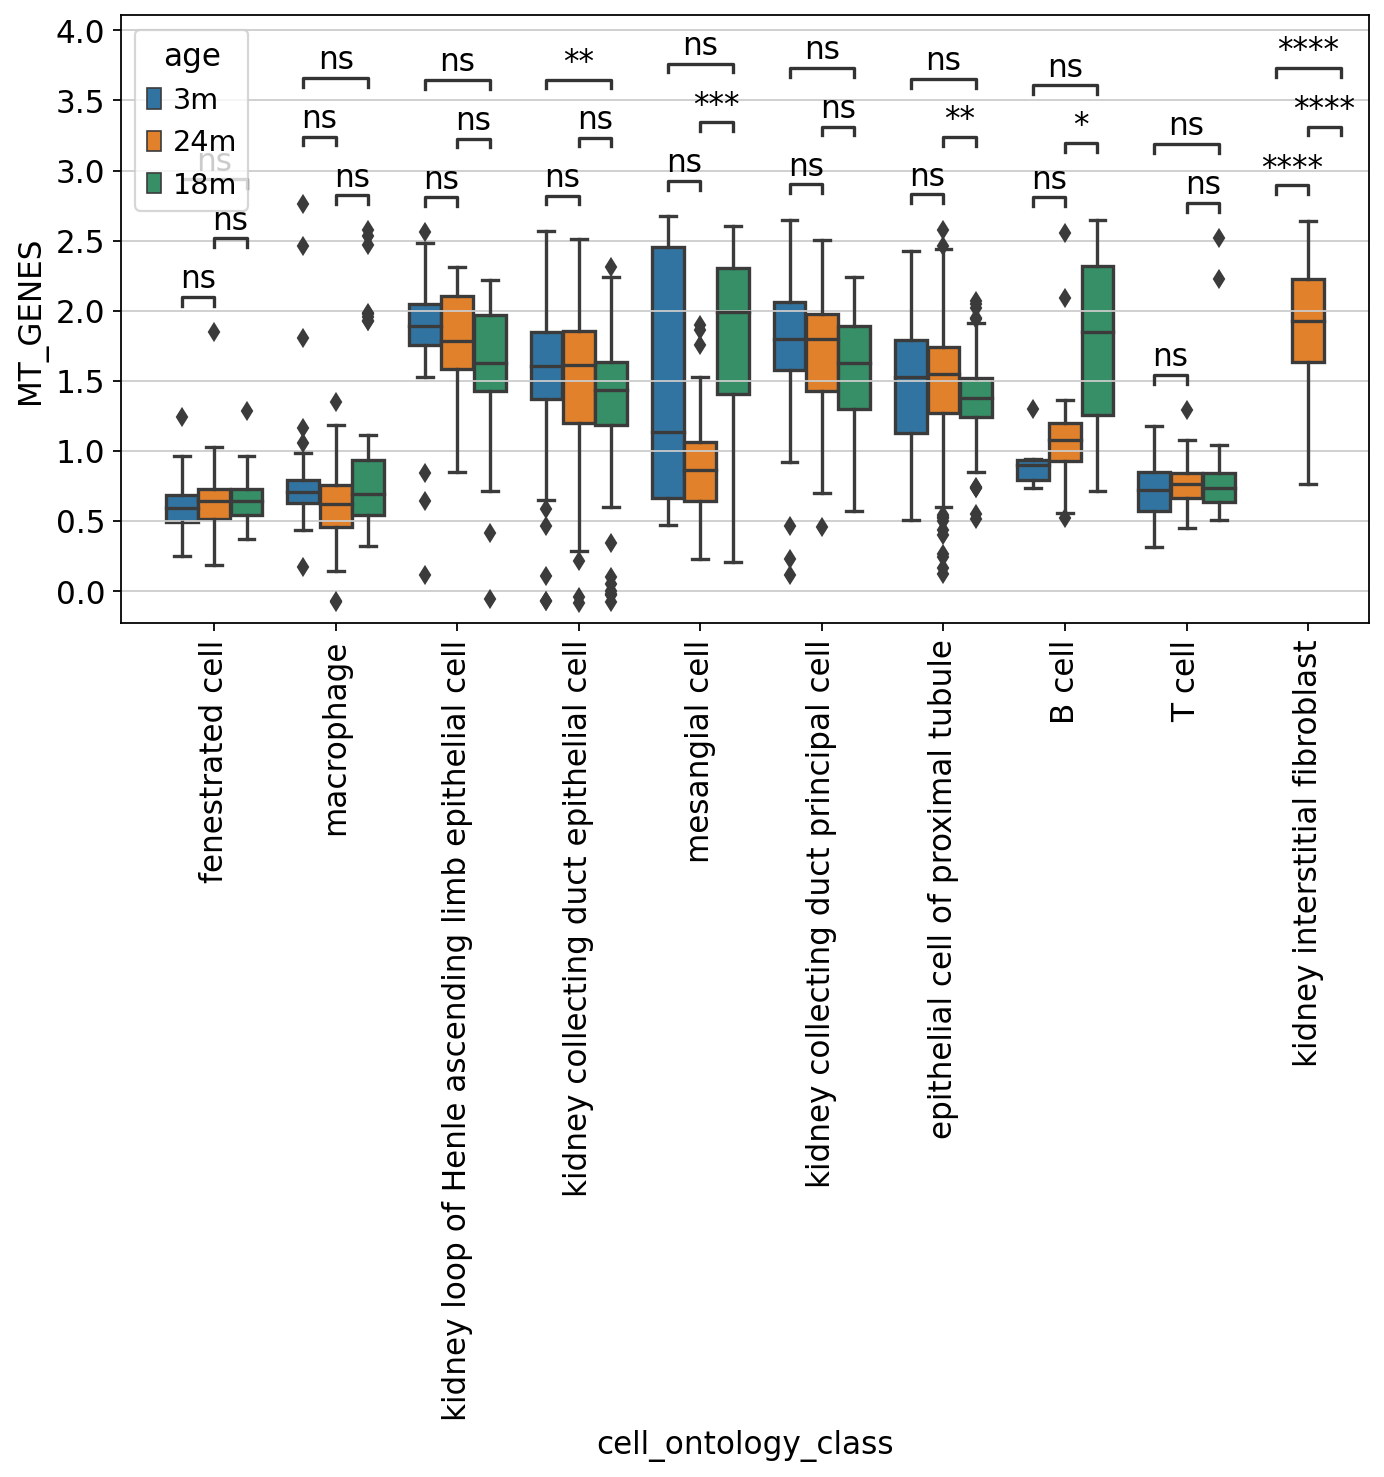

In [41]:
#Don't really think score_genes can be used for mt-encoded genes

df = tissue3[['age','cell_ontology_class','MT_GENES']]

x = "cell_ontology_class" 
y = "MT_GENES" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Nc-encoded MT genes

In [ ]:
#score_genes
df = tissue3[['age','cell_ontology_class','NC_MT_GENES']]

x = "cell_ontology_class" 
y = "NC_MT_GENES" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Atp6

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Atp6']]

x = "cell_ontology_class" 
y = "mt-Atp6" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Atp8

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Atp8']]

x = "cell_ontology_class" 
y = "mt-Atp8" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Co1

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Co1']]

x = "cell_ontology_class" 
y = "mt-Co1" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Co2

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Co2']]

x = "cell_ontology_class" 
y = "mt-Co2" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Co3

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Co3']]

x = "cell_ontology_class" 
y = "mt-Co3" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Cytb

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Cytb']]

x = "cell_ontology_class" 
y = "mt-Cytb" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Nd1

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Nd1']]

x = "cell_ontology_class" 
y = "mt-Nd1" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Nd2

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Nd2']]

x = "cell_ontology_class" 
y = "mt-Nd2" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Nd3

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Nd3']]

x = "cell_ontology_class" 
y = "mt-Nd3" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Nd4

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Nd4']]

x = "cell_ontology_class" 
y = "mt-Nd4" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Nd4l

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Nd4l']]

x = "cell_ontology_class" 
y = "mt-Nd4l" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Nd5

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Nd5']]

x = "cell_ontology_class" 
y = "mt-Nd5" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)


#### mt-Nd6

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Nd6']]

x = "cell_ontology_class" 
y = "mt-Nd6" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)


#### mt-Rnr1

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Rnr1']]

x = "cell_ontology_class" 
y = "mt-Rnr1" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)


#### mt-Rnr2

In [ ]:
df = tissue3[['age','cell_ontology_class','mt-Rnr2']]

x = "cell_ontology_class" 
y = "mt-Rnr2" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)


### Genes and score_genes

#### histplot

In [ ]:
sns.histplot(, color='navy')
sns.histplot(, color='gold')


#### leiden10vs15

In [ ]:
#score genes 
df = tissue3[['age','cell_ontology_class','leiden10vs15']]

x = "cell_ontology_class" 
y = "leiden10vs15" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### leiden15vs10

In [ ]:
#score genes 
df = tissue3[['age','cell_ontology_class','leiden15vs10']]

x = "cell_ontology_class" 
y = "leiden15vs10" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### BCR

In [ ]:
df = tissueBCR[['age','cell_ontology_class','BCR']]

x = "cell_ontology_class" 
y = "BCR" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

In [ ]:
df = tissueBCR[['age','cell_ontology_class','Cd79a']]

x = "cell_ontology_class" 
y = "Cd79a" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Cd79a, maybe interesting

In [ ]:
df = tissueBCR[['age','cell_ontology_class','Cd79a']]

x = "cell_ontology_class" 
y = "Cd79a" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m"))  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Cd79b, maybe interesting

In [ ]:
df = tissueBCR[['age','cell_ontology_class','Cd79b']]

x = "cell_ontology_class" 
y = "Cd79b" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Ighg2b, very diff than thymus

In [ ]:
df = df_kid[['age','cell_ontology_class','Ighg2b']]
x = "cell_ontology_class" 
y = "Ighg2b" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m"))
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Cd38, hmmm?

Cd38 has a zero inflated distribution so I don't think this test works. However it is interesting to see CD38 expression in annotated endothelial cells

In [ ]:
df = df_kid[['age','cell_ontology_class','Cd38']]

x = "cell_ontology_class" 
y = "Cd38" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### M1 score_genes, didn't have expected results for me

In [ ]:
df = tissue_M[['age','cell_ontology_class','M1']]

x = "cell_ontology_class" 
y = "M1" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### M2 score_genes

In [ ]:
df = tissue_M[['age','cell_ontology_class','M2']]

x = "cell_ontology_class" 
y = "M2" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

### Yunna et al, M1/M2

In [ ]:
y = y_df.loc[y_df['cell_ontology_class'] == 'macrophage']
yy=y[['age','Fcgr4']]
yunna

**Is this overpowering the single gene when I don't use all cell types?**

significant when only macrophages: Fcgr3, Fcgr4
M1: Fcgr3 is Cd16. Fcgr4 similar?

In [ ]:
df = yy
x = "age"
y = "Fcgr4"
order = ['3m', '18m', '24m']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("3m", "18m"), ("3m", "24m"), ("18m", "24m")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='outside', verbose=2)

In [ ]:
df = y_df[['age','cell_ontology_class','Fcgr4']]

x = "cell_ontology_class" 
y = "Fcgr4" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

### Exploring Novel Markers to Delineate Murine M1 and M2 Macrophages

'Novel Markers to Delineate Murine M1 and M2 Macrophages' by Jablonski et al. 2015.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4689374/

ABSTRACT
"...We validated by real-time PCR an M1-exclusive pattern of expression for **CD38**, G-protein coupled receptor 18 (**Gpr18**) and Formyl peptide receptor 2 (**Fpr2**) whereas Early growth response protein 2 (**Egr2**) and **c-Myc** were M2-exclusive. We further confirmed these data by flow cytometry and show that M1 and M2 macrophages can be distinguished by their relative expression of CD38 and Egr2. Egr2 labeled more M2 macrophages (~70%) than the canonical M2 macrophage marker Arginase-1, which labels 24% of M2 macrophages. Conversely, CD38 labeled most (71%) in vitro M1 macrophages. In vivo, a similar CD38+ population greatly increased after LPS exposure. Overall, this work defines exclusive and common M1 and M2 signatures and provides novel and improved tools to distinguish M1 and M2 murine macrophages."

"Therefore, we performed transcriptional mRNA profiling in murine macrophages in either undifferentiated (M0), M1 or M2 conditions."

"Among these, 21 genes corresponding to canonical M1 markers such as Nos2, IL-1β, IL-6, IL-12β, CCR7, Inhba and TNF-α were also up-regulated in our M1 array (labeled in Fig 1A). Likewise, known M2 macrophage markers Arg1, Chi3l3/Ym1, Retnla/Fizz1, Egr2, Fn1 and Mrc1/CD206 were also expressed in our M2 dataset (labeled in Fig 1B)."

**Paper uses Bone marrow derived macrophages (BMDM). Maybe these genes aren't transcribed often in kidney macrophages?**

### Jablonski

In [ ]:
Jablonski_genes = ['Cd38','Myc','Fpr2','Egr2','Gpr18','Nos2','Il1b','Il6','Il12b','Ccr7','Inhba','Tnf','Arg1','Retnla','Fn1','Mrc1'
                  ]
Jablonski_obs = gene_expression_obs(tissue,Jablonski_genes)
Jablonski_df = gene_expression_df(Jablonski_obs,Jablonski_genes)

In [ ]:
ja = Jablonski_df.loc[Jablonski_df['cell_ontology_class'] == 'fenestrated cell']
jja=ja[['age','Cd38']]

**overpowering?**

In [ ]:
df = jja
x = "age"
y = "Cd38"
order = ['3m', '18m', '24m']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("3m", "18m"), ("3m", "24m"), ("18m", "24m")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='outside', verbose=2)

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Cd38']]

x = "cell_ontology_class" 
y = "Cd38" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Mrc1, M2

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Mrc1']]

x = "cell_ontology_class" 
y = "Mrc1" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Fn1, M2

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Fn1']]

x = "cell_ontology_class" 
y = "Fn1" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Retnla, M2

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Retnla']]

x = "cell_ontology_class" 
y = "Retnla" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Arg1, M2

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Arg1']]

x = "cell_ontology_class" 
y = "Arg1" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Tnf, M1

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Tnf']]

x = "cell_ontology_class" 
y = "Tnf" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Inhba, M1

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Inhba']]

x = "cell_ontology_class" 
y = "Inhba" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Il12b, M1

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Il12b']]

x = "cell_ontology_class" 
y = "Il12b" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Ccr7, M1

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Ccr7']]

x = "cell_ontology_class" 
y = "Ccr7" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Il6, M1

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Il6']]

x = "cell_ontology_class" 
y = "Il6" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Il1b, M1 (at least the macs are expressing THIS one)

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Il1b']]

x = "cell_ontology_class" 
y = "Il1b" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Nos2, M1

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Nos2']]

x = "cell_ontology_class" 
y = "Nos2" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

In [ ]:
df = tissueIFN[['age','cell_ontology_class','Cd38']]

x = "cell_ontology_class" 
y = "Cd38" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
    
    (("DN4 thymocyte", "3m"), ("DN4 thymocyte", "18m")),
    (("DN4 thymocyte", "3m"), ("DN4 thymocyte", "24m")),
    (("DN4 thymocyte", "18m"), ("DN4 thymocyte", "24m")),
    
    (("endothelial cell", "3m"), ("endothelial cell", "18m")),
    (("endothelial cell", "3m"), ("endothelial cell", "24m")),
    (("endothelial cell", "18m"), ("endothelial cell", "24m")),
    
    (("epithelial cell of thymus", "3m"), ("epithelial cell of thymus", "18m")),
    (("epithelial cell of thymus", "3m"), ("epithelial cell of thymus", "24m")),
    (("epithelial cell of thymus", "18m"), ("epithelial cell of thymus", "24m")),
    
    (("fibroblast", "3m"), ("fibroblast", "18m")),
    (("fibroblast", "3m"), ("fibroblast", "24m")),
    (("fibroblast", "18m"), ("fibroblast", "24m")),
    
    (("thymocyte", "3m"), ("thymocyte", "18m")),
    (("thymocyte", "3m"), ("thymocyte", "24m")),
    (("thymocyte", "18m"), ("thymocyte", "24m")),
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Myc, M2

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Myc']]

x = "cell_ontology_class" 
y = "Myc" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Fpr2, M1

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Fpr2']]

x = "cell_ontology_class" 
y = "Fpr2" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Egr2, M2

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Egr2']]

x = "cell_ontology_class" 
y = "Egr2" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Gpr18, M1

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Gpr18']]

x = "cell_ontology_class" 
y = "Gpr18" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)